In [6]:
# HIDDEN
from datascience import *
import numpy as np
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
np.set_printoptions(threshold=50)

### Example: Gender Ratio in the U.S. Population ###

We are now equipped with enough coding skills to examine features and trends in subgroups of the U.S. population. In this example, we will look at the distribution of males and females across age groups.

To start off, let's run some code we developed earlier and create a table `us_pop` of U.S. population data for the years 2010 and 2014. This is the same table that we had named `simple` in our previous examination of these data.

In [11]:
census_url = 'http://www.census.gov/popest/data/national/asrh/2014/files/NC-EST2014-AGESEX-RES.csv'
full_census_table = Table.read_table(census_url)

partial_census_table = full_census_table.select(['SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014'])

us_pop = partial_census_table.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2014', '2014')

us_pop

SEX,AGE,2010,2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


As we know from having examined this dataset earlier, a [description of the table](http://www.census.gov/popest/data/national/asrh/2014/files/NC-EST2014-AGESEX-RES.pdf) appears online. Here is a reminder of what the table contains. 

Each row represents an age group. The `SEX` column contains numeric codes: `0` stands for the total, `1` for male, and `2` for female. The `AGE` column contains ages in completed years, but the special value `999` represents the entire population regardless of age. The rest of the columns contain estimates of the US population.

### Understanding `AGE` = 100 ###
As a preliminary, let's interpret data in the final age category in the table, where `AGE` is 100. The code below extracts the rows for the combined group of men and women (`SEX` code 0) for the highest ages.

In [12]:
us_pop.where('SEX', are.equal_to(0)).where('AGE', are.between(97, 101))

SEX,AGE,2010,2014
0,97,68893,83731
0,98,47037,60185
0,99,32178,41828
0,100,54409,72197


Not surprisingly, the numbers of people are smaller at higher ages – for example, there are fewer 99-year-olds than 98-year-olds. 

It does come as a surprise, though, that the numbers for `AGE` 100 are quite a bit larger than those for age 99. A closer examination of the documentation shows that it's because the Census Bureau used 100 as the code for everyone aged 100 or more. 

The row with `AGE` 100 doesn't just represent 100-year-olds – it also includes those who are older than 100. That is why the numbers in that row are larger than in the row for the 99-year-olds.

### Overall Proportions of Males and Females ###
We will now begin looking at gender ratios. First, let's look at all the age groups together. Remember that this means looking at the rows where the "age" is coded 999. The table `all_ages` contains this information. There are three rows: one for the total of both genders, one for males (`SEX` code 1), and one for females (`SEX` code 2).

In [13]:
all_ages = us_pop.where('AGE', are.equal_to(999))
all_ages

SEX,AGE,2010,2014
0,999,309347057,318857056
1,999,152089484,156936487
2,999,157257573,161920569


Row 0 of `all_ages` contains the total U.S. population in each of the two years. The United States had just over 309 million people in 2010 and just under 319 million in 2014.

Row 1 contains the counts for males and Row 2 for females. Compare these two rows to see that in each of 2010 and 2014, there were more females than males in the United States. 

The population counts in Row 1 and Row 2 add up to the total population in Row 0. 

For comparability with other quantities, we will need to convert these counts to percents out of the total population. Let's access the totals and name them for later use. Remember that the `column` method returns the data in a column as an array, and `item` returns a specified element of an array. In the last line of the cell, notice the use of a comma to display both values at once.

In [10]:
pop_2010 = all_ages.column('2010').item(0)
pop_2014 = all_ages.column('2014').item(0)
pop_2010, pop_2014

(309347057, 318857056)

We now augment `all_ages` with columns containing the proportions of males and females in the population in each of the two years. The top element in each of those columns is 1 because the top row represents the entire population. The proportions for males and females in Rows 1 and 2 add up to 1.

The split between males and females in the population was not 50-50. Consistent with our earlier observation that there were more females than males, about 50.8% of the population was female and about 49.2% male in each of the two years.

In [59]:
all_ages.with_columns(
    '2010 Proportion', all_ages.column('2010')/pop_2010,
    '2014 Proportion', all_ages.column('2014')/pop_2014
    )

SEX,AGE,2010,2014,2010 Proportion,2014 Proportion
0,999,309347057,318857056,1,1
1,999,152089484,156936487,0.491647,0.492184
2,999,157257573,161920569,0.508353,0.507816


### Proportions of Boys and Girls among Infants

When we look at infants, however, the opposite is true. Let's define infants to be babies who have not yet completed one year, represented in the row corresponding to `AGE` 0. Here are their numbers in the population. You can see that male infants outnumbered female infants in both the years.

In [14]:
infants = us_pop.where('AGE', are.equal_to(0))
infants

SEX,AGE,2010,2014
0,0,3951330,3948350
1,0,2018420,2017857
2,0,1932910,1930493


As before, we can convert these counts to percents out of the total numbers of infants in the two years. The resulting table shows that in 2010 and 2014, about 51% of infants in the U.S. were male. 

In [32]:
infants_2010 = infants.column('2010').item(0)
infants_2014 = infants.column('2014').item(0)
infants.with_columns(
    '2010 Proportion', infants.column('2010')/infants_2010,
    '2014 Proportion', infants.column('2014')/infants_2014
)

SEX,AGE,2010,2014,2010 Proportion,2014 Proportion
0,0,3951330,3948350,1,1
1,0,2018420,2017857,0.51082,0.511063
2,0,1932910,1930493,0.48918,0.488937


On a closely related topic, it has long been observed that the proportion of boys among newborns is slightly more than 1/2. The reason for this is not thoroughly understood, and [scientists are still working on it](http://www.npr.org/sections/health-shots/2015/03/30/396384911/why-are-more-baby-boys-born-than-girls).

### Female:Male Gender Ratio at Each Age ###

We have seen that while there are more baby boys than baby girls, there are more females than males overall. So it's clear that the split between genders must vary across age groups.

To study this variation, we will separate out the data for the females and the males, and eliminate the row where all the ages are aggregated and `AGE` is coded as 999.

The tables `females` and `males` contain the data for each the two genders.

In [16]:
females_all_rows = us_pop.where('SEX', are.equal_to(2))
females = females_all_rows.where('AGE', are.not_equal_to(999))
females

SEX,AGE,2010,2014
2,0,1932910,1930493
2,1,1937556,1938870
2,2,2002177,1935270
2,3,2010648,1956572
2,4,1993240,1959950
2,5,1988080,1961391
2,6,1993603,2024024
2,7,1979908,2031760
2,8,1971142,2014402
2,9,2018378,2009560


In [17]:
males_all_rows = us_pop.where('SEX', are.equal_to(1))
males = males_all_rows.where('AGE', are.not_equal_to(999))
males

SEX,AGE,2010,2014
1,0,2018420,2017857
1,1,2020332,2023253
1,2,2088685,2022502
1,3,2101272,2048618
1,4,2084312,2043498
1,5,2076573,2043467
1,6,2079410,2110328
1,7,2063139,2122240
1,8,2054462,2105122
1,9,2107037,2097272


The plan now is to compare the number of women and the number of men at each age, for each of the two years. Array and Table methods give us straightforward ways to do this. 

For any given age, we can get the Female:Male gender ratio by dividing the number of females by the number of males. To do this in one step for the year 2010, we can use `column` to extract the array of female counts and the corresponding array of male counts, and then simply divide one array by the other. Elementwise division will create an array of gender ratios for all the years.

The code below uses this idea to create a table `ratios` consisting of the `AGE` column as well as columns containing the gender ratios across all ages for the years 2010 and 2014.

In [18]:
ratios = Table().with_columns(
    'AGE', np.arange(101),
    '2010 F:M RATIO', females.column('2010')/males.column('2010'),
    '2014 F:M RATIO', females.column('2014')/males.column('2014')
)
ratios

AGE,2010 F:M RATIO,2014 F:M RATIO
0,0.957635,0.956705
1,0.959029,0.958293
2,0.958583,0.956869
3,0.956872,0.955069
4,0.956306,0.959115
5,0.957385,0.959835
6,0.958735,0.959104
7,0.959658,0.957366
8,0.959444,0.956905
9,0.957922,0.958178


You can see from the display that the ratios are all around 0.96 for children aged nine or younger. When the Female:Male ratio is less than 1, there are fewer females than males. Thus what we are seeing is that there were fewer girls than boys in each of the age groups 0, 1, 2, and so on through 9, in both 2010 and 2014. Moreover, in each of these age groups and in either year, there were about 96 girls for every 100 boys.

So how can the overall proportion of females in the population be higher than the males? 

Something extraordinary happens when we examine the other end of the age range. Here are the Female:Male ratios for people aged more than 75.

In [56]:
ratios.where('AGE', are.above(75)).show()

AGE,2010 F/M RATIO,2014 F/M RATIO
76,1.26713,1.23457
77,1.29711,1.25745
78,1.32622,1.28202
79,1.36095,1.31567
80,1.40293,1.34074
81,1.44442,1.37925
82,1.50288,1.41864
83,1.5566,1.46461
84,1.62726,1.51951
85,1.70985,1.57462


Not only are all of these ratios greater than 1, signifying more women than men in all of these age groups, many of them are considerably greater than 1. 

- At ages 89 and 90 the ratios are close to 2, meaning that there were about twice as many women as men at those ages in both 2010 and 2014.
- At ages 98 and 99, there were about 3.5 to 4 times as many women as men. 

The ratios are slightly lower in 2014 compared to 2010. If you are wondering how many people there were at these advanced ages, you can use Python to find out:

In [21]:
males.where('AGE', are.between(98, 100))

SEX,AGE,2010,2014
1,98,9504,13649
1,99,6104,9037


In [22]:
females.where('AGE', are.between(98, 100))

SEX,AGE,2010,2014
2,98,37533,46536
2,99,26074,32791


The graph below shows the gender ratios plotted against age. The blue curve shows the 2010 ratios, and the gold curve shows 2014. At the high ages, the ratios are slightly lower for 2014 than for 2010, as you can also see in a table of ratios at those ages.

The ratios are almost 1 (signifying close to equal numbers of males and females) for ages 0 through 60, but they start shooting up dramatically (more females than males) starting at about age 65.

For now, ignore the code that generates the plot; we'll study it soon. Just note how the plot is connected to what we observed in the tables above:

That females outnumber males in the U.S. is partly due to the marked gender imbalance in favor of women among senior citizens.

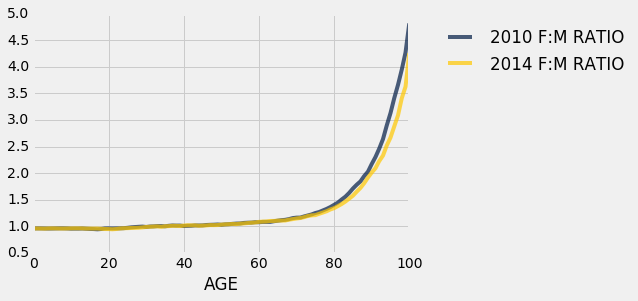

In [23]:
ratios.plot('AGE')